In [43]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("Customer Churn.csv")
df.head(40)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replace and Change Dtype

In [46]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [47]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [49]:
df["customerID"] .duplicated().sum()

0

# Column Transformtion

In [50]:
def conv(value):    # Create Function TO Modify column "senior citizen"
    if value == 1:   # it contain value in the forn of 1 or 0 convert to Yes or NO
        return "Yes"a1a1
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv) #coverting 



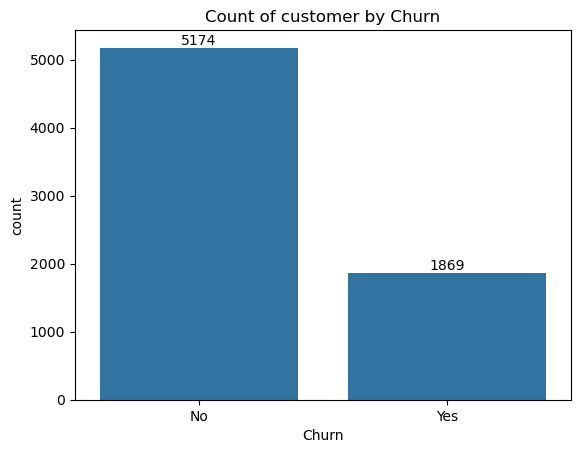

In [101]:
ax = sns.countplot(x = df["Churn"])

ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")
plt.show()

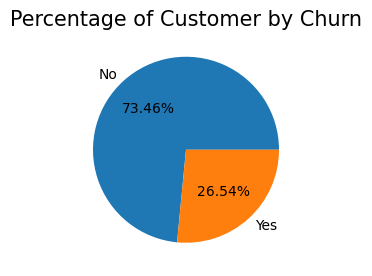

In [105]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels = gb.index,autopct = "%1.2f%%")

plt.title("Percentage of Customer by Churn",fontsize = 15)
plt.show()

#from given pie chart we can concklude that 26.54% customer churned out

#now explore the reason behind it

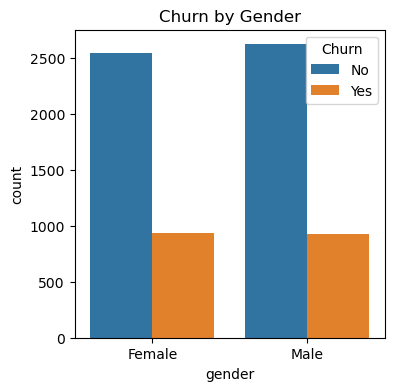

In [113]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender",data = df,hue = "Churn")
plt.title("Churn by Gender")
plt.show()

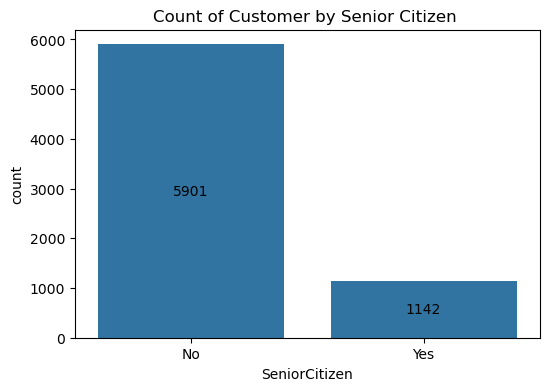

In [162]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0],label_type = "center")

plt.title("Count of Customer by Senior Citizen ")
plt.show()

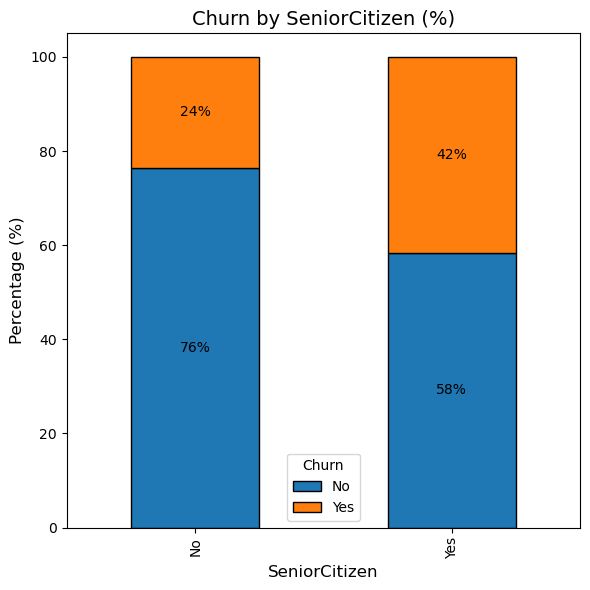

In [156]:
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
ax = percentages.plot(kind='bar', stacked=True, figsize=(6, 6), edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f%%', label_type='center')

plt.title("Churn by SeniorCitizen (%)", fontsize=14)
plt.xlabel("SeniorCitizen", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.tight_layout()
plt.show()

# print(grouped)
# print(percentages)

#Comparative a grater percentage of people in SeniorCitizen category has Churned.

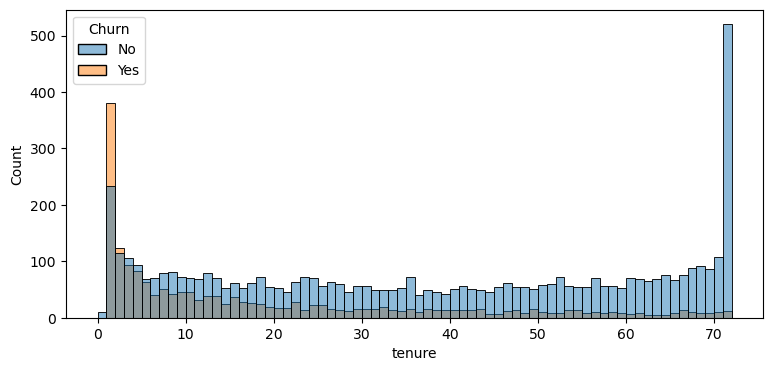

In [166]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure",data = df,bins = 72,hue = "Churn")
plt.show()

#People who have use our services for longtime have stay and people who have used our services for 1# or 2# month have churned

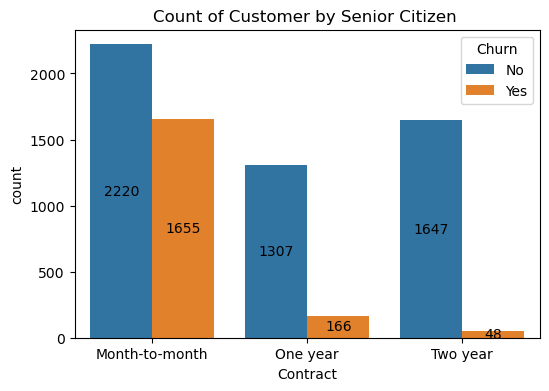

In [174]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "Contract",data = df,hue = "Churn")

for container in ax.containers:
    ax.bar_label(container, fmt='%d',label_type = "center")

plt.title("Count of Customer by Senior Citizen ")
plt.show()

#People who have month to month contract likely to churn then from who have 1 or 2 years of contract

In [180]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

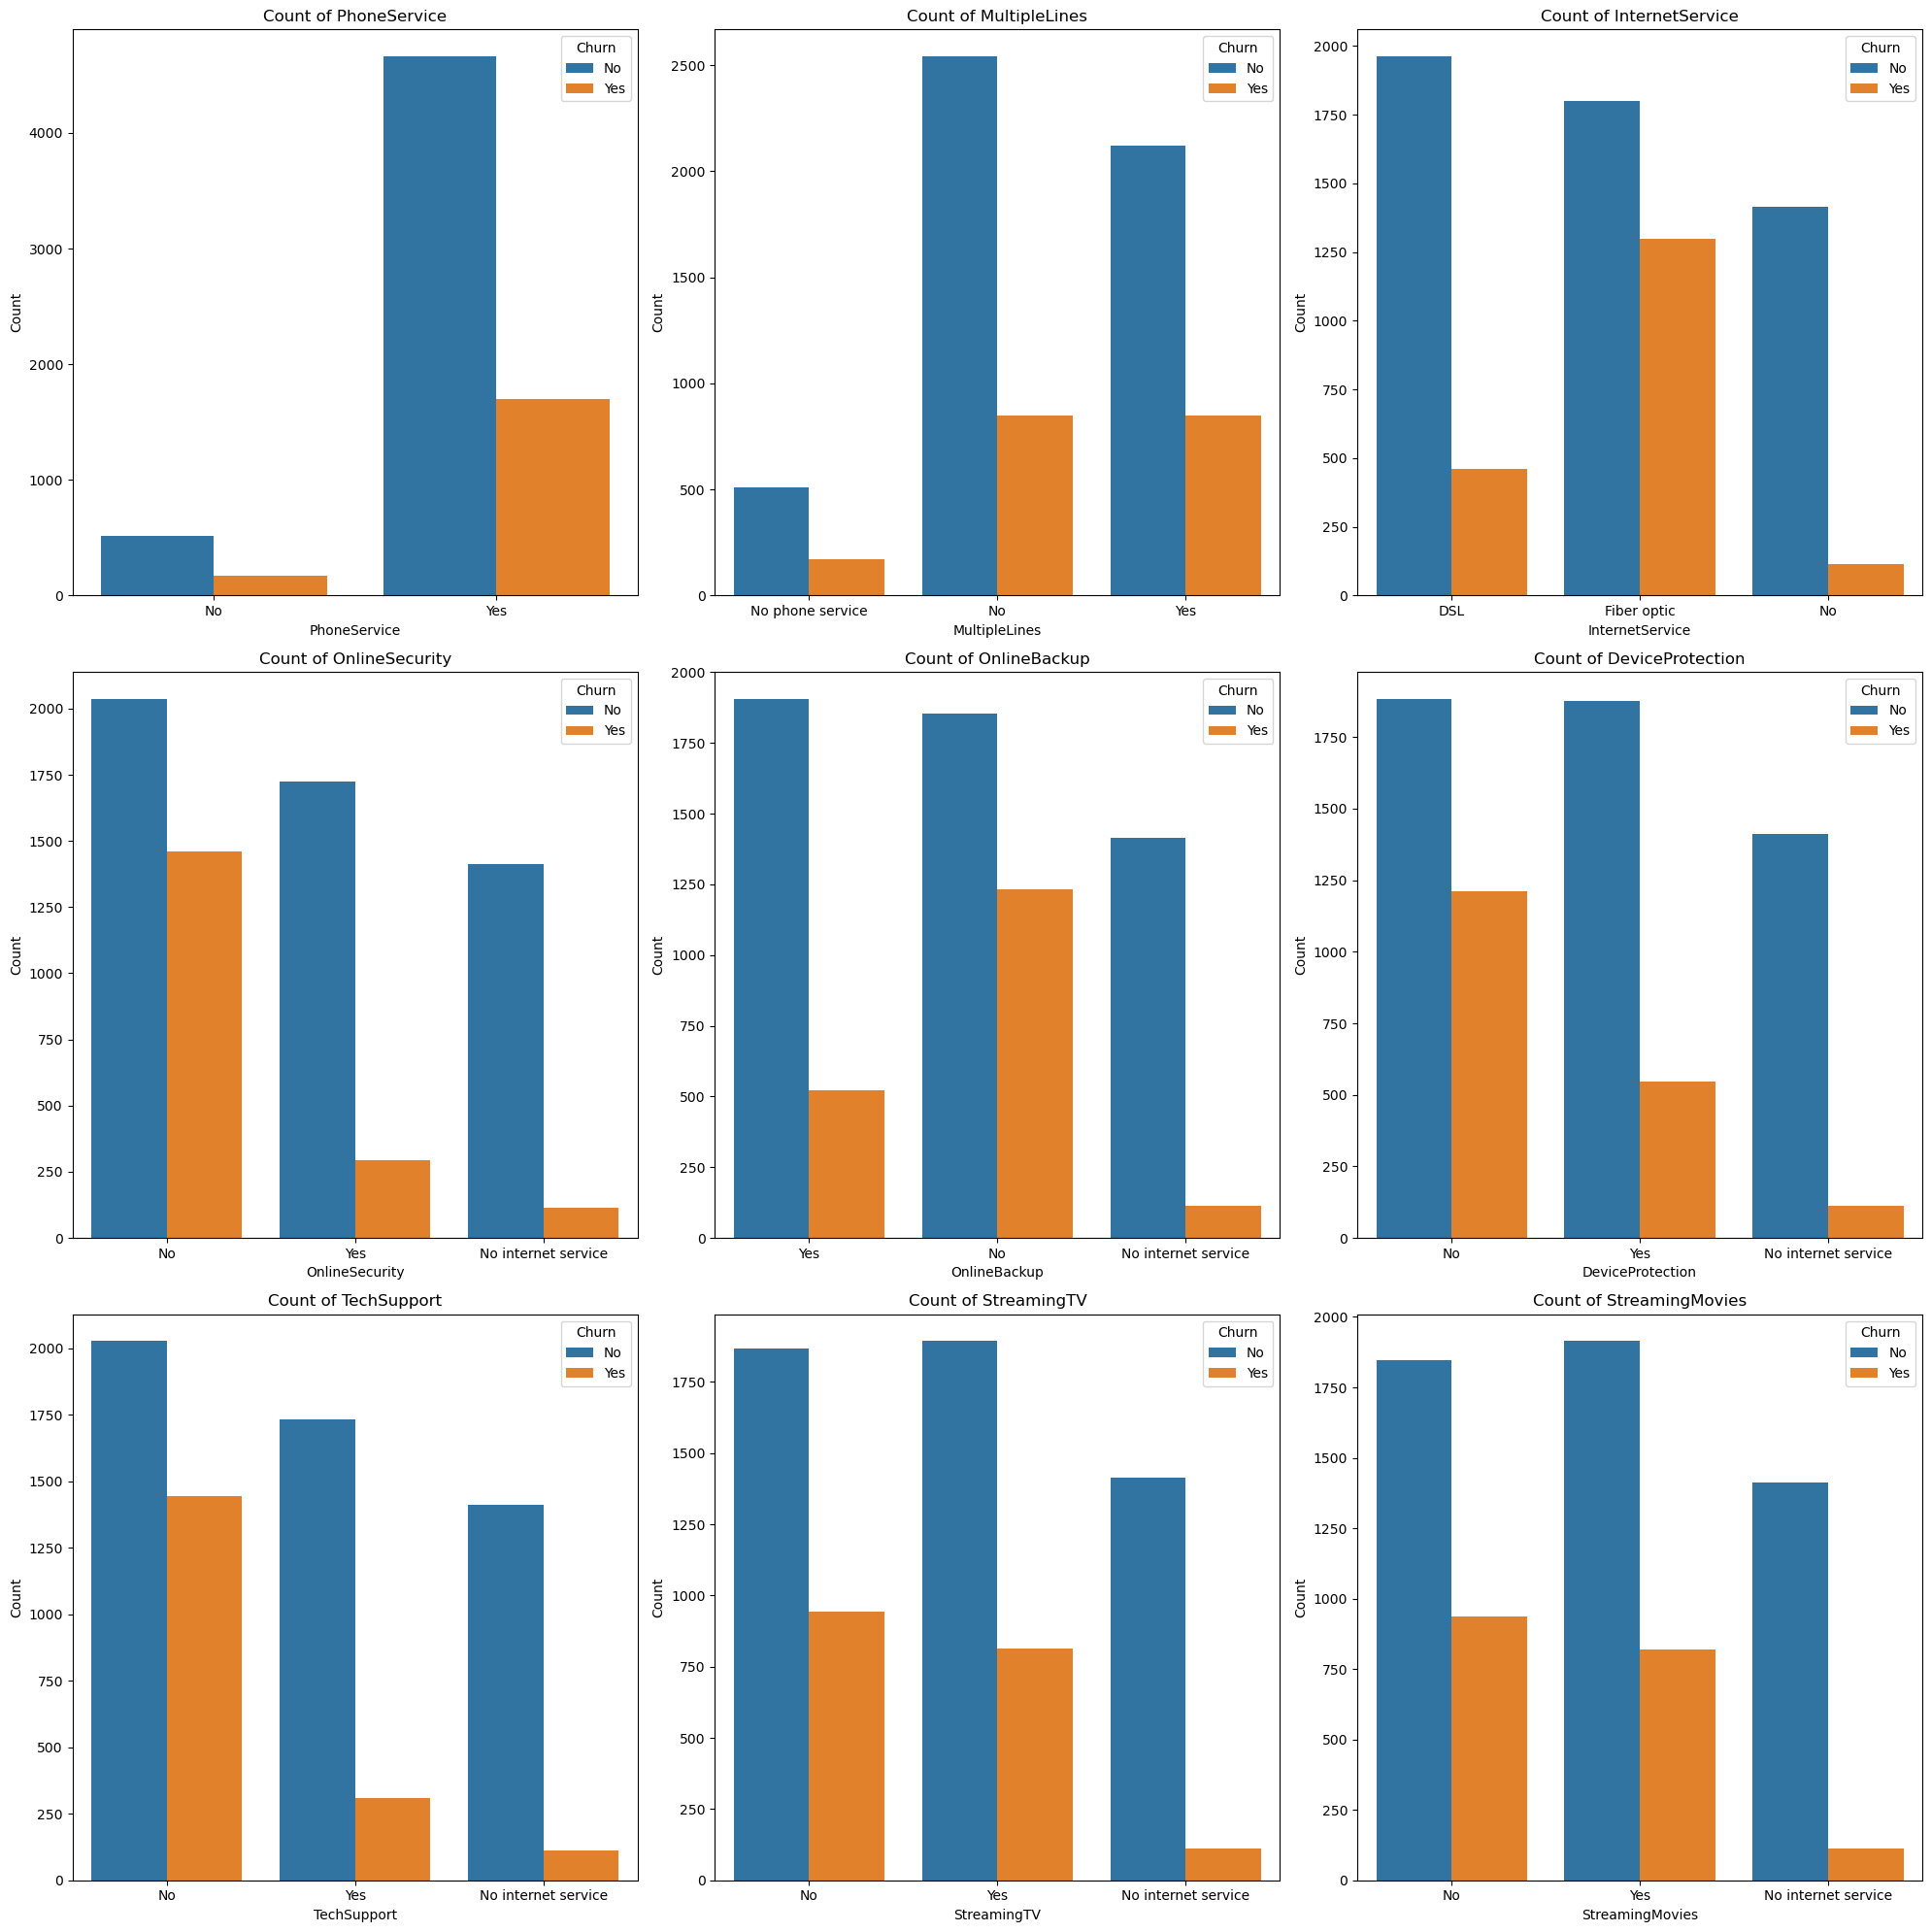

In [198]:
columns = ['PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
num_cols = len(columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))  # Adjust rows/columns for layout
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue = df["Churn"])
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")



# Adjust layout
plt.tight_layout()
plt.show()


#Features like InternetService and OnlineSecurity show noticeable differences in churn behavior, with certain categories having higher churn rates. For example, customers with "No" OnlineSecurity or "Fiber optic" InternetService seem to have higher churn. These insights can help identify service-related factors influencing customer churn.

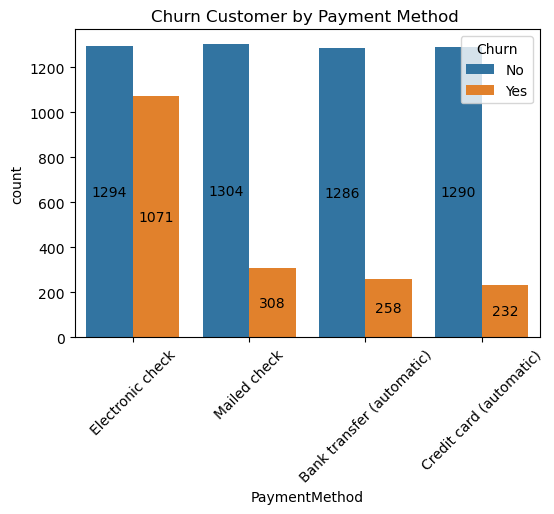

In [200]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod",data = df,hue = "Churn")

for container in ax.containers:
    ax.bar_label(container, fmt='%d',label_type = "center")

plt.title("Churn Customer by Payment Method ")
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn when he is using elctronic check as a Payment method